In [267]:
%load_ext autoreload
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings; warnings.simplefilter('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the cleaned text from the excel sheet


In [194]:
data = pd.read_excel("clean.xlsx")
data.sort_values(by='JourneyDate',inplace=True,ascending=True)

# Charting Status Analysis

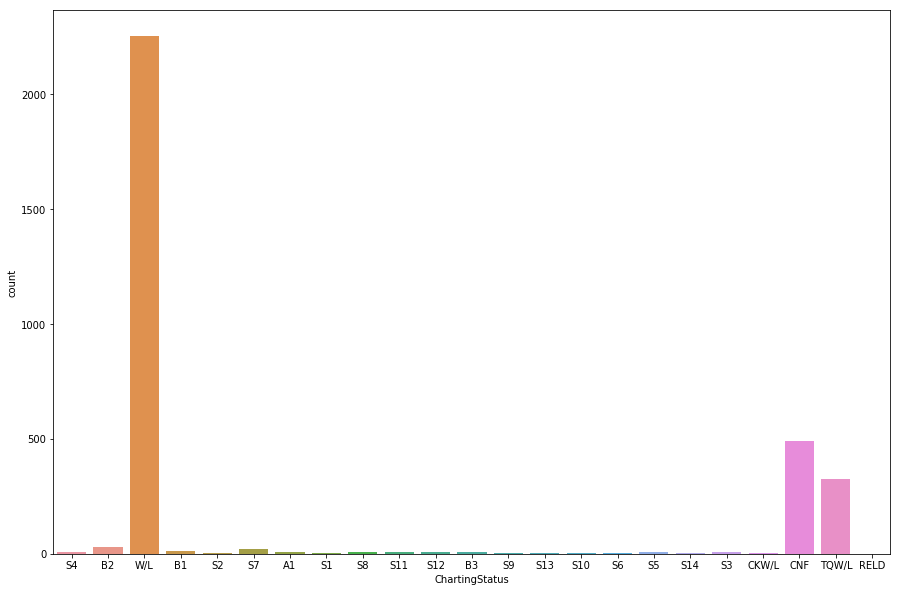

In [195]:
plt.figure(figsize=(15,10))
c1 = sns.countplot(data['ChartingStatus'])

Here we can see that a large number of Ticket were in the waiting list.  
    1.CNF : Ticket is confirmed , seat will be allocated once chart is prepared.  
    2.CKW/l : Tatkal waiting List  
    3.TQW/L : Station waiting list  
    4.RELD : Alternative option for birth/seat is provided   
    5.S1-s14 : Sleeper coach   
    6.B2 : AC coach 2 birth   

# Feature engineering on Journey Date

In [196]:
#Feature engineering for Journeydate
column_1 = data['JourneyDate']

temp = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              #"hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              #"weekofyear": column_1.dt.weekofyear,
              #"dayofweek": column_1.dt.dayofweek,
              #"weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

data.reset_index(drop=True, inplace=True)
temp.reset_index(drop=True, inplace=True)
data = pd.concat([data,temp],axis=1)

In [197]:
data.head()

,JourneyDate,BookingStatus,TQWL,W/L,TrainNo,ClassOfTravel,ChartingStatus,year,month,day,dayofyear,week,quarter
0,2016-12-01,W/L,0,5,*12864,SL,S4,2016,12,1,336,48,4
1,2016-12-01,W/L,0,3,*12864,3A,B2,2016,12,1,336,48,4
2,2016-12-02,W/L,0,9,*12864,3A,B2,2016,12,2,337,48,4
3,2016-12-03,W/L,0,67,*12864,SL,W/L,2016,12,3,338,48,4
4,2016-12-03,W/L,0,61,*12864,SL,W/L,2016,12,3,338,48,4


In [198]:
data['ChartingStatus'] = data.ChartingStatus.str.replace('[S0-9\s]+', 'SL')
data['ChartingStatus'] = data.ChartingStatus.str.replace('ASL', 'AC').replace('BSL','AC')
data.head()

,JourneyDate,BookingStatus,TQWL,W/L,TrainNo,ClassOfTravel,ChartingStatus,year,month,day,dayofyear,week,quarter
0,2016-12-01,W/L,0,5,*12864,SL,SL,2016,12,1,336,48,4
1,2016-12-01,W/L,0,3,*12864,3A,AC,2016,12,1,336,48,4
2,2016-12-02,W/L,0,9,*12864,3A,AC,2016,12,2,337,48,4
3,2016-12-03,W/L,0,67,*12864,SL,W/L,2016,12,3,338,48,4
4,2016-12-03,W/L,0,61,*12864,SL,W/L,2016,12,3,338,48,4


In [199]:
chart= data['ChartingStatus'].value_counts()
chart

W/L      2253
CNF       490
TQW/L     327
SL         95
AC         56
CKW/L       3
RELD        1
Name: ChartingStatus, dtype: int64

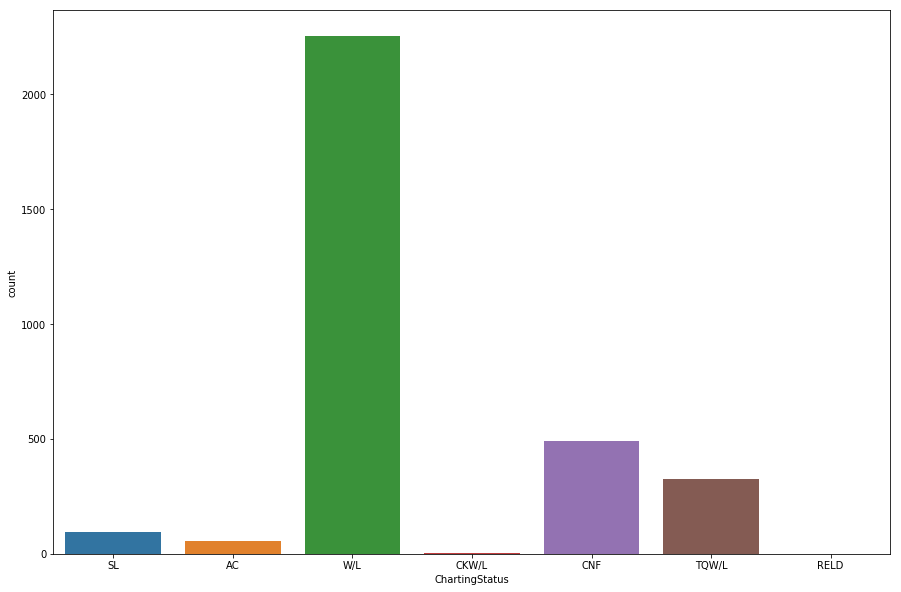

In [200]:
plt.figure(figsize=(15,10))
g = sns.countplot(data['ChartingStatus'])

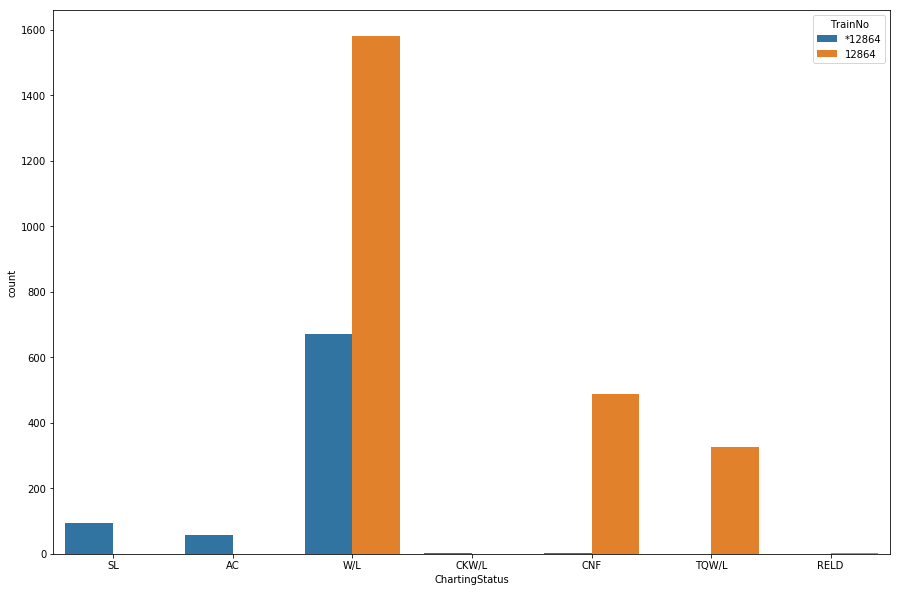

In [201]:
plt.figure(figsize=(15,10))
g = sns.countplot(data['ChartingStatus'],hue=data['TrainNo'])

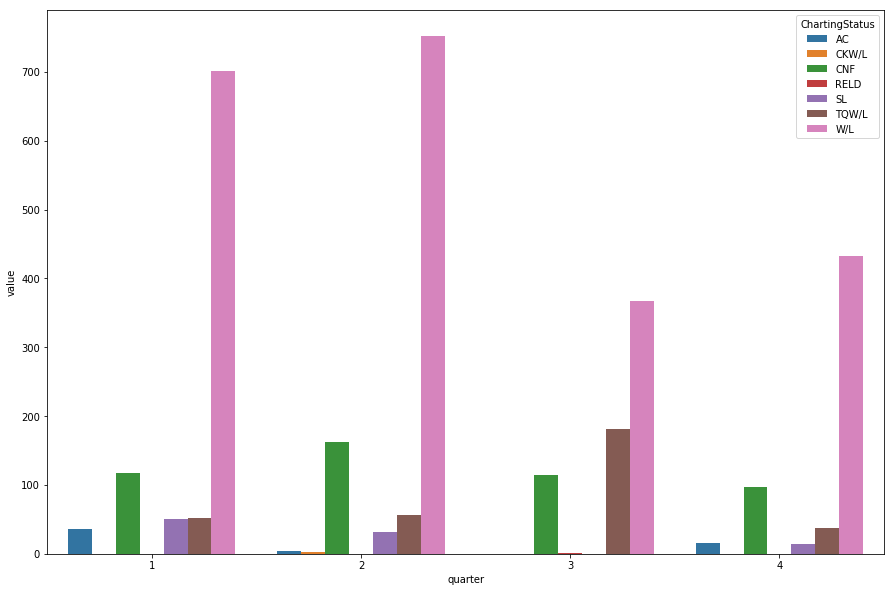

In [202]:
h1 = pd.crosstab(data.quarter,data.ChartingStatus)
stacked = h1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,10))
b1 = sns.barplot(x=stacked.quarter, y=stacked.value, hue=stacked.ChartingStatus)

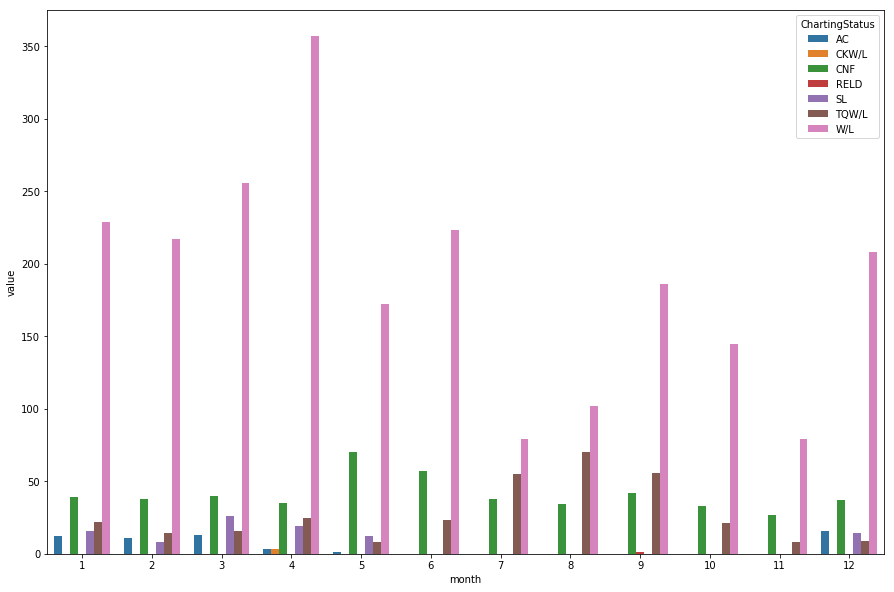

In [203]:
h1 = pd.crosstab(data.month,data.ChartingStatus)
stacked = h1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,10))
b1 = sns.barplot(x=stacked.month, y=stacked.value, hue=stacked.ChartingStatus)

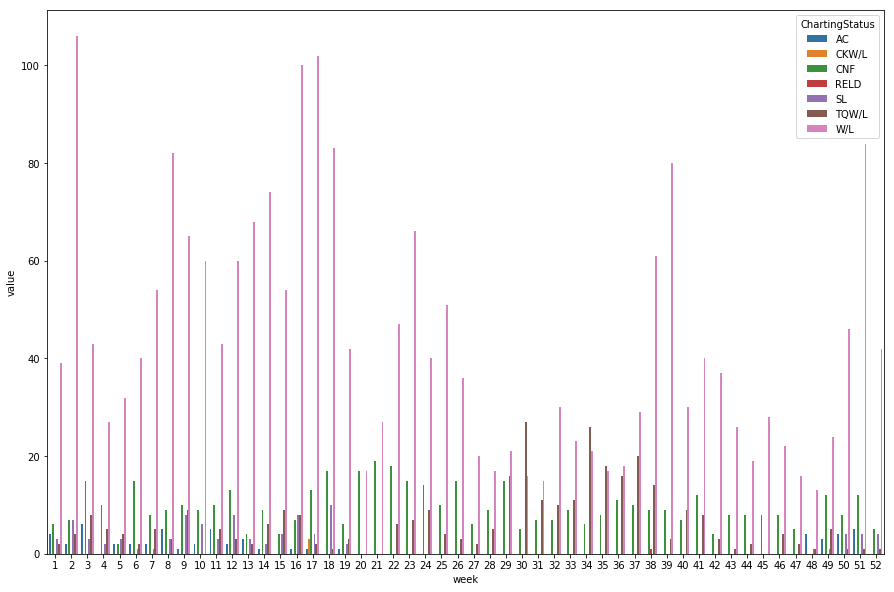

In [204]:
h1 = pd.crosstab(data.week,data.ChartingStatus)
stacked = h1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,10))
b1 = sns.barplot(x=stacked.week, y=stacked.value, hue=stacked.ChartingStatus)

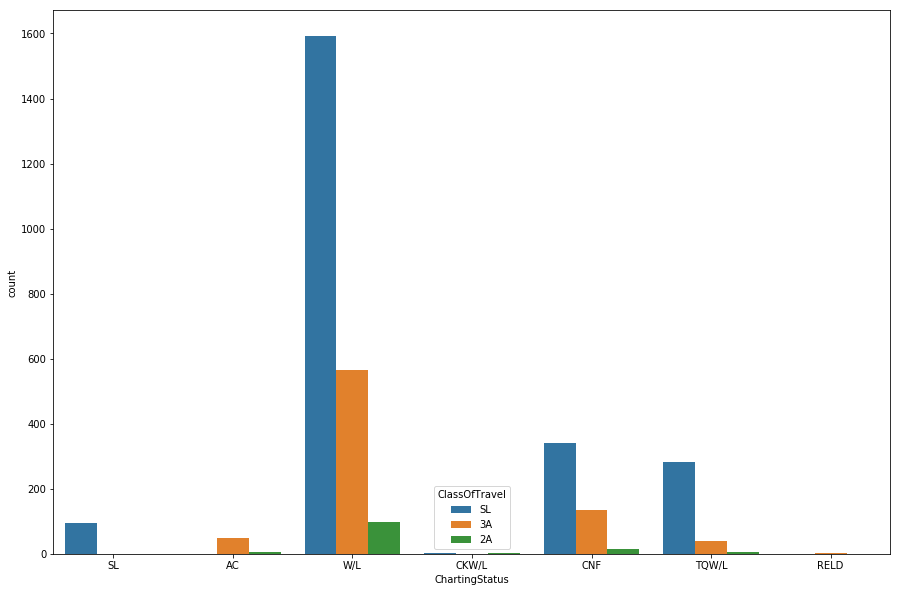

In [205]:
plt.figure(figsize=(15,10))
g = sns.countplot(data['ChartingStatus'],hue=data['ClassOfTravel'])

# Distribution of TQWL

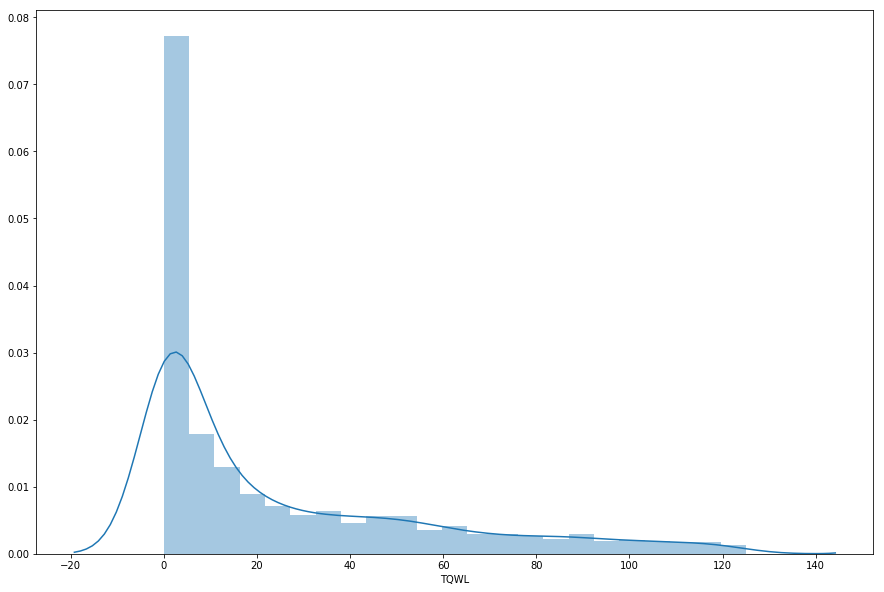

In [206]:
plt.figure(figsize=(15,10))
d1 = sns.distplot(data['TQWL'])

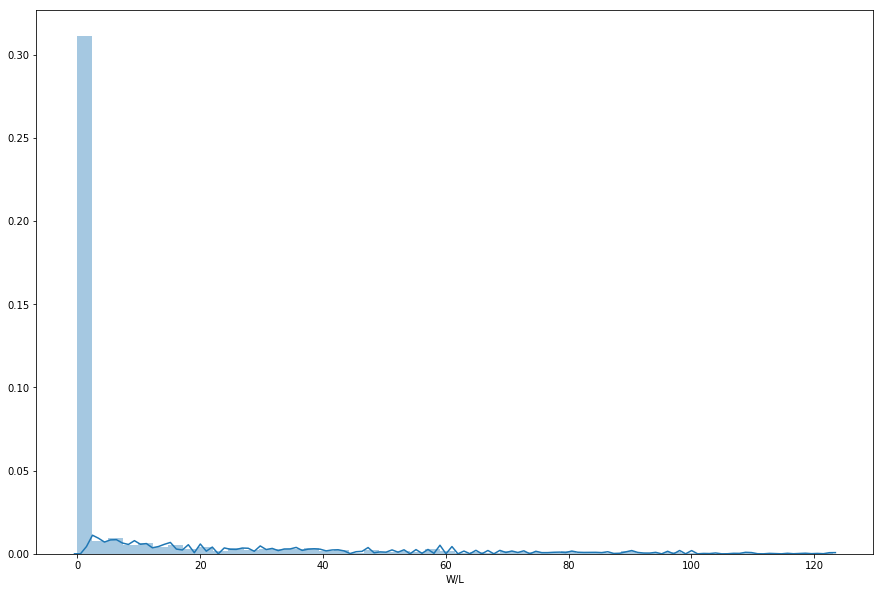

In [207]:
plt.figure(figsize=(15,10))
d1 = sns.distplot(data['W/L'])

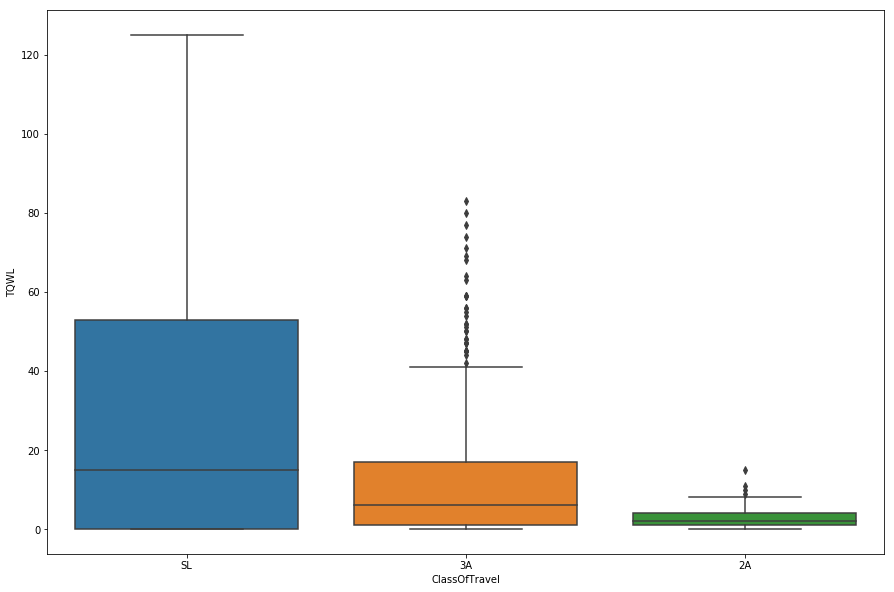

In [208]:
plt.figure(figsize=(15,10))
b1 = sns.boxplot(x=data['ClassOfTravel'],y=data['TQWL'],data=data)

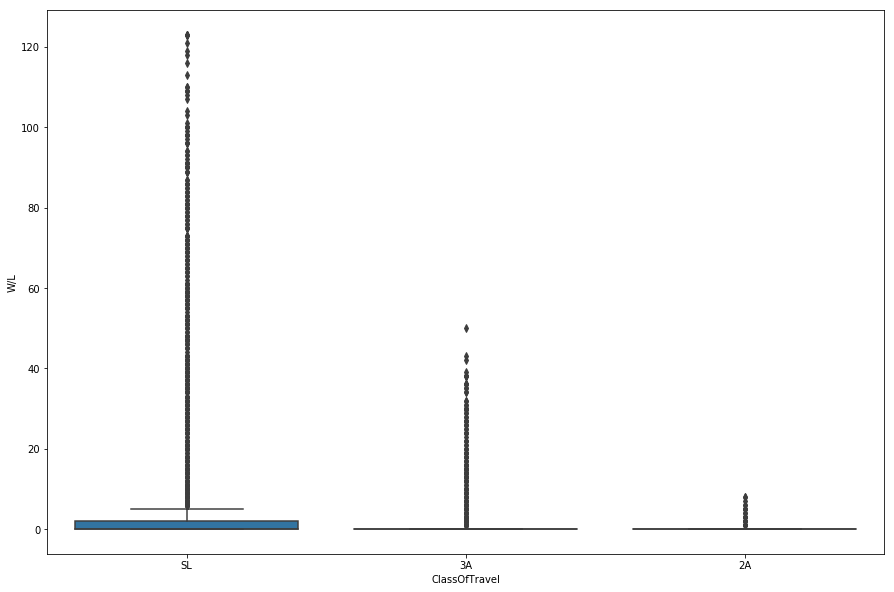

In [209]:
plt.figure(figsize=(15,10))
b1 = sns.boxplot(x=data['ClassOfTravel'],y=data['W/L'],data=data)

In [210]:
#plt.figure(figsize=(15,10))
#l1 = sns.lineplot(x='JourneyDate',y='TQWL',hue ='ClassOfTravel',data=data)

In [211]:
#This works pretty well in Spyder ,searching for why not working here
#l2 = sns.lineplot(x='JourneyDate',y='W/L',hue ='ClassOfTravel',data=data)

Text(0,0.5,'Frequency of Bookings')

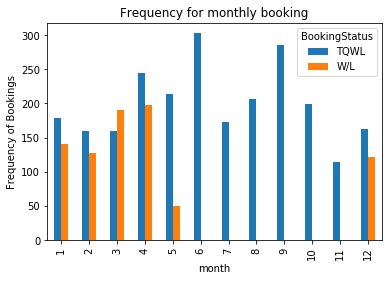

In [212]:
pd.crosstab(data.month,data.BookingStatus).plot(kind='bar')
plt.title('Frequency for monthly booking')
plt.xlabel('month')
plt.ylabel('Frequency of Bookings')

Text(0,0.5,'Frequency of Bookings')

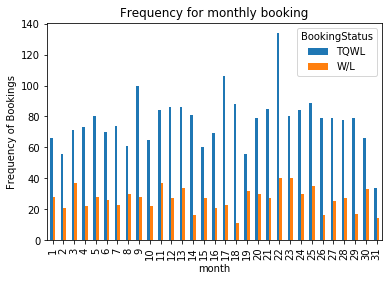

In [213]:
pd.crosstab(data.day,data.BookingStatus).plot(kind='bar')
plt.title('Frequency for monthly booking')
plt.xlabel('month')
plt.ylabel('Frequency of Bookings')

Text(0,0.5,'Frequency of Bookings')

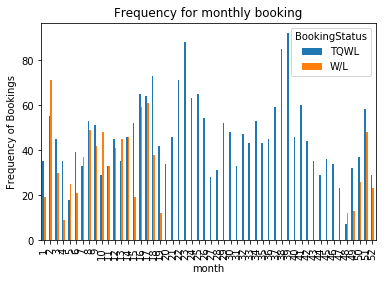

In [214]:
pd.crosstab(data.week,data.BookingStatus).plot(kind='bar')
plt.title('Frequency for monthly booking')
plt.xlabel('month')
plt.ylabel('Frequency of Bookings')

Text(0,0.5,'Frequency of Bookings')

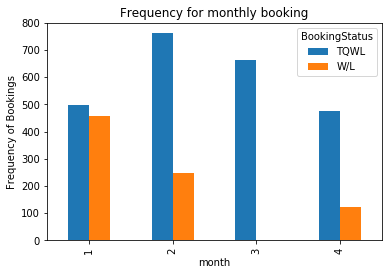

In [215]:
pd.crosstab(data.quarter,data.BookingStatus).plot(kind='bar')
plt.title('Frequency for monthly booking')
plt.xlabel('month')
plt.ylabel('Frequency of Bookings')

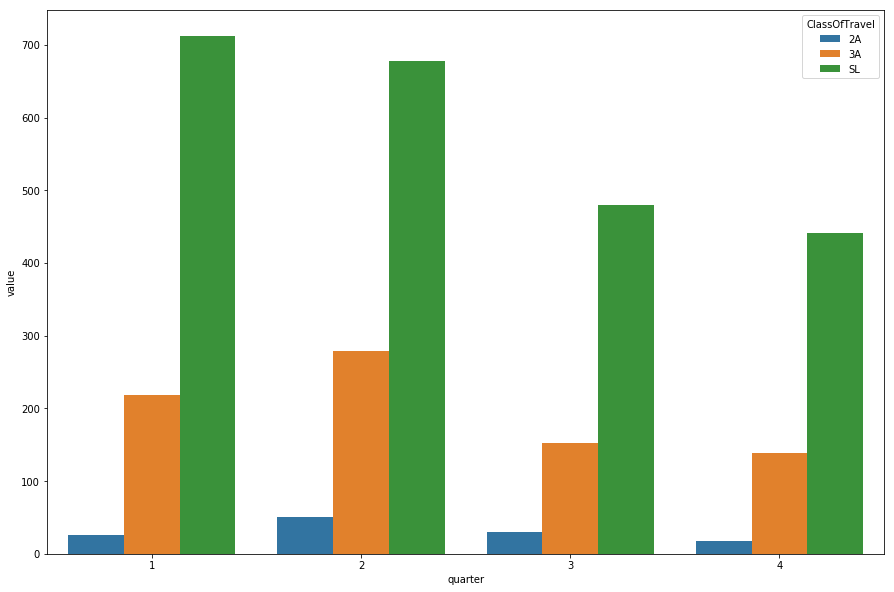

In [216]:
h1 = pd.crosstab(data.quarter,data.ClassOfTravel)
stacked = h1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,10))
b1 = sns.barplot(x=stacked.quarter, y=stacked.value, hue=stacked.ClassOfTravel)

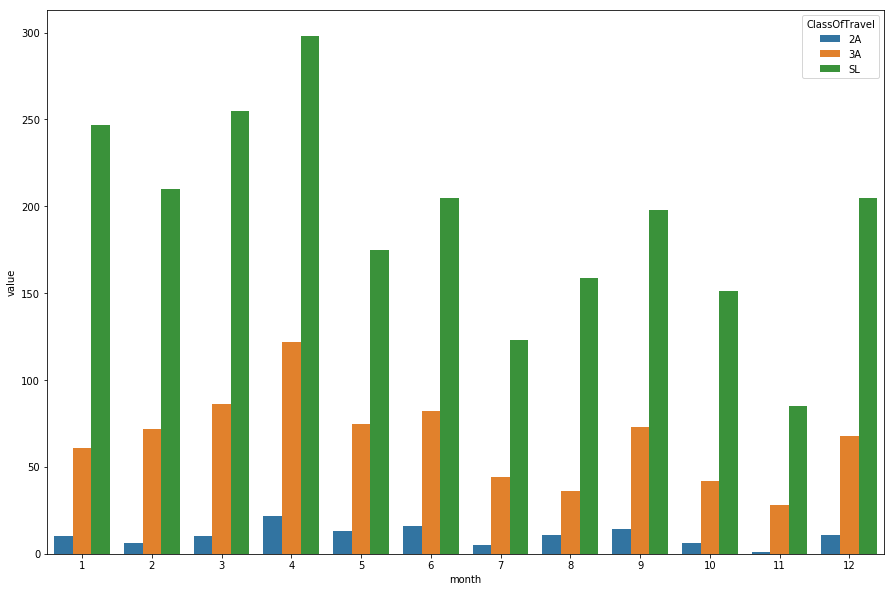

In [217]:
h1 = pd.crosstab(data.month,data.ClassOfTravel)
stacked = h1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,10))
b1 = sns.barplot(x=stacked.month, y=stacked.value, hue=stacked.ClassOfTravel)

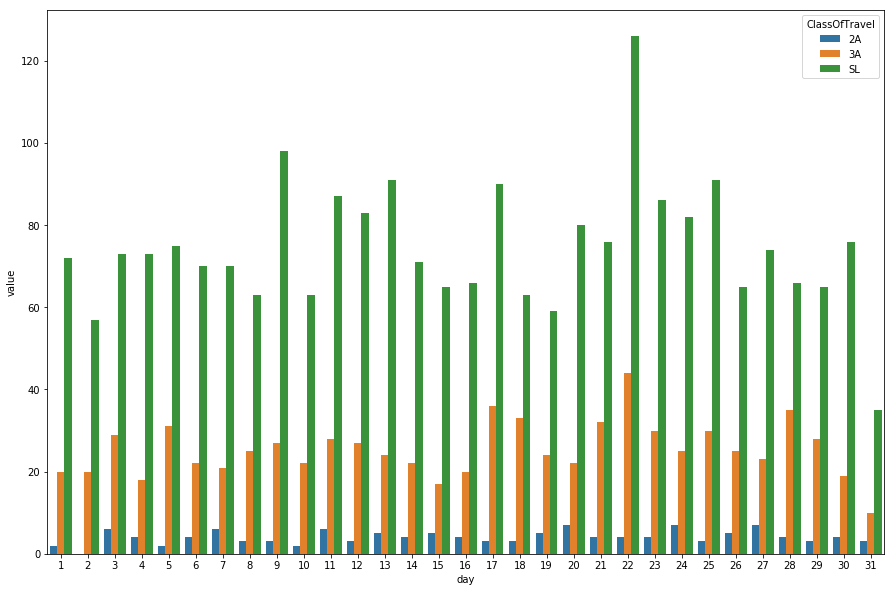

In [218]:
h1 = pd.crosstab(data.day,data.ClassOfTravel)
stacked = h1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,10))
b1 = sns.barplot(x=stacked.day, y=stacked.value, hue=stacked.ClassOfTravel)

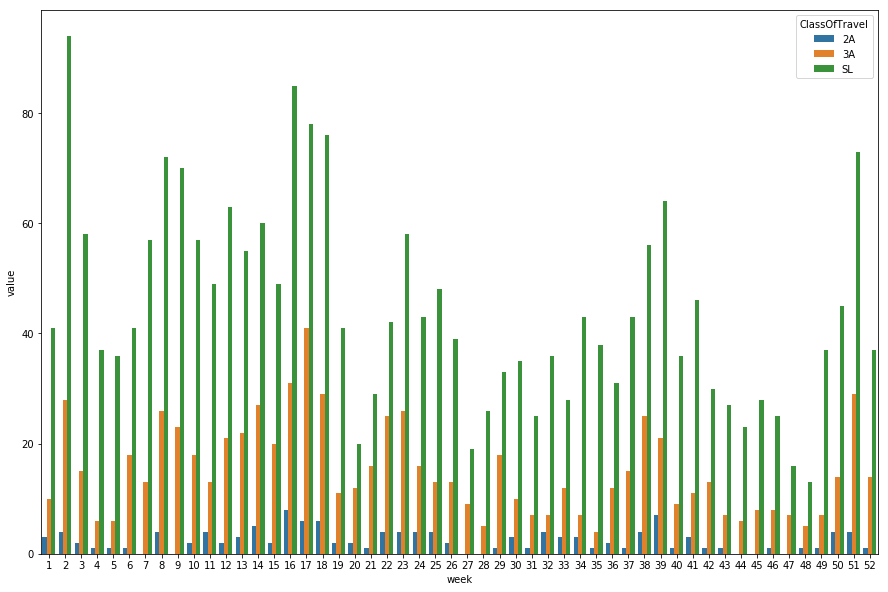

In [219]:
h1 = pd.crosstab(data.week,data.ClassOfTravel)
stacked = h1.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(15,10))
b1 = sns.barplot(x=stacked.week, y=stacked.value, hue=stacked.ClassOfTravel)

Obseravtions:  
    1.Number of booking for Ticket is quite high during the second week of year,8,9,16,17,18,23,39,49,51 week.So possible reason are like most of the family plan for vaccation during there childeren holidays in may june , during october we have Deepawali and Dusrea , mostly people are going to there hometown.Simalarly last week people are travelling more . So during these period you can also see there are lot of bookings are there.    
    2.People prefer to use AC class for vooking more during the March-April time.

# Logistic regression model 


In [220]:
data.head()

,JourneyDate,BookingStatus,TQWL,W/L,TrainNo,ClassOfTravel,ChartingStatus,year,month,day,dayofyear,week,quarter
0,2016-12-01,W/L,0,5,*12864,SL,SL,2016,12,1,336,48,4
1,2016-12-01,W/L,0,3,*12864,3A,AC,2016,12,1,336,48,4
2,2016-12-02,W/L,0,9,*12864,3A,AC,2016,12,2,337,48,4
3,2016-12-03,W/L,0,67,*12864,SL,W/L,2016,12,3,338,48,4
4,2016-12-03,W/L,0,61,*12864,SL,W/L,2016,12,3,338,48,4


We need to remove JourneyDate , encode all other categorical variable

In [221]:
data.drop(columns=['JourneyDate'],axis=1,inplace=True)
data.head()

,BookingStatus,TQWL,W/L,TrainNo,ClassOfTravel,ChartingStatus,year,month,day,dayofyear,week,quarter
0,W/L,0,5,*12864,SL,SL,2016,12,1,336,48,4
1,W/L,0,3,*12864,3A,AC,2016,12,1,336,48,4
2,W/L,0,9,*12864,3A,AC,2016,12,2,337,48,4
3,W/L,0,67,*12864,SL,W/L,2016,12,3,338,48,4
4,W/L,0,61,*12864,SL,W/L,2016,12,3,338,48,4


We are converting the Chartingstatus into 1 and 0.  
Confirmed - 1   (S1-S14,B1-3,A1,RDE)
Not-confirmed - 0  (This include W/L , PQW/L and CKW/L)


In [222]:
data['ChartingStatus'].value_counts()

W/L      2253
CNF       490
TQW/L     327
SL         95
AC         56
CKW/L       3
RELD        1
Name: ChartingStatus, dtype: int64

In [223]:
data['ChartingStatus'] = data.ChartingStatus.str.replace('PQW/L','0').replace('CKW/L','0').replace('TQW/L','0').replace('W/L','0')
data['ChartingStatus'] = data.ChartingStatus.str.replace('CNF', '1').replace('SL','1').replace('AC','1').replace('RELD','1')

In [224]:
data['ChartingStatus'].value_counts()

0    2583
1     642
Name: ChartingStatus, dtype: int64

In [225]:
#Change the categorical variable into number
data = pd.get_dummies(data,columns=['BookingStatus','TrainNo','ClassOfTravel'])

In [229]:
data['ChartingStatus'].value_counts()
data['ChartingStatus'] = pd.to_numeric(data['ChartingStatus'])
data.dtypes

TQWL                  int64
W/L                   int64
ChartingStatus        int64
year                  int64
month                 int64
day                   int64
dayofyear             int64
week                  int64
quarter               int64
BookingStatus_TQWL    uint8
BookingStatus_W/L     uint8
TrainNo_*12864        uint8
TrainNo_12864         uint8
ClassOfTravel_2A      uint8
ClassOfTravel_3A      uint8
ClassOfTravel_SL      uint8
dtype: object

# Feature selection

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

y = data['ChartingStatus']
data.drop(columns=['ChartingStatus'],axis=1,inplace=True)

model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(data, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(data.columns[rfe.support_]))

Selected features: ['month', 'quarter', 'BookingStatus_TQWL', 'BookingStatus_W/L', 'TrainNo_*12864', 'TrainNo_12864', 'ClassOfTravel_2A', 'ClassOfTravel_SL']


In [ ]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(data, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(data.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

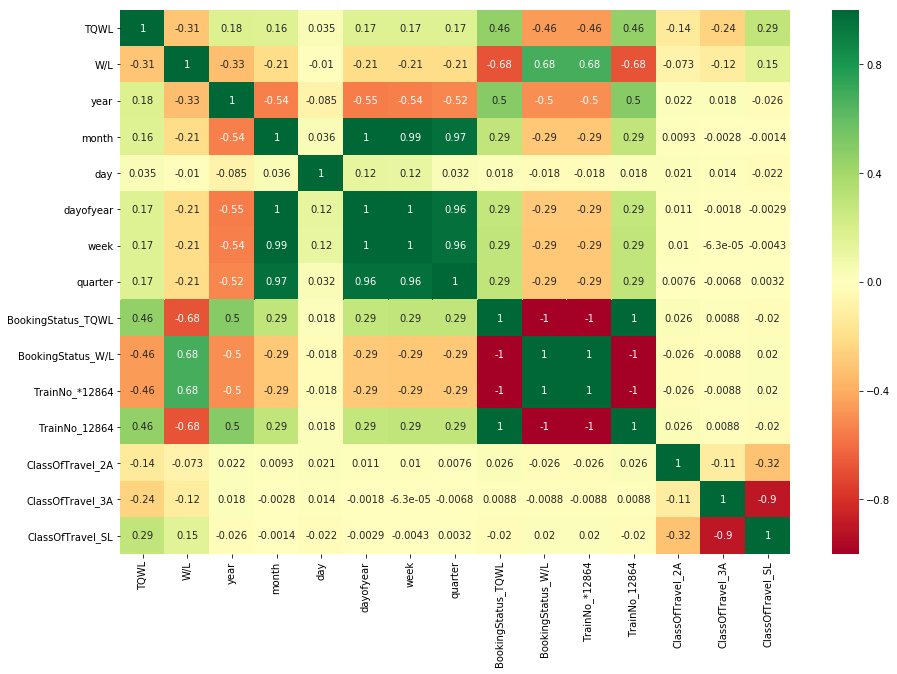

In [231]:
plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [258]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [259]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [260]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[283 229]
 [ 32 101]]


In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.55      0.68       512
          1       0.31      0.76      0.44       133

avg / total       0.78      0.60      0.63       645



In [263]:
from sklearn.metrics import f1_score
for thresh in np.arange(0.1, 0.901, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, f1_score(y_test, (y_pred_proba>thresh).astype(int))))

F1 score at threshold 0.1 is 0.33879781420765026
F1 score at threshold 0.11 is 0.34112792297111416
F1 score at threshold 0.12 is 0.34444444444444444
F1 score at threshold 0.13 is 0.3468531468531469
F1 score at threshold 0.14 is 0.3488045007032349
F1 score at threshold 0.15 is 0.3502824858757062
F1 score at threshold 0.16 is 0.3522727272727273
F1 score at threshold 0.17 is 0.3505747126436781
F1 score at threshold 0.18 is 0.35072463768115947
F1 score at threshold 0.19 is 0.35380116959064334
F1 score at threshold 0.2 is 0.3524229074889868
F1 score at threshold 0.21 is 0.3510324483775812
F1 score at threshold 0.22 is 0.34730538922155685
F1 score at threshold 0.23 is 0.3499245852187029
F1 score at threshold 0.24 is 0.3515151515151515
F1 score at threshold 0.25 is 0.3541984732824428
F1 score at threshold 0.26 is 0.35747303543913717
F1 score at threshold 0.27 is 0.35968992248062015
F1 score at threshold 0.28 is 0.36477987421383645
F1 score at threshold 0.29 is 0.3659305993690851
F1 score at t

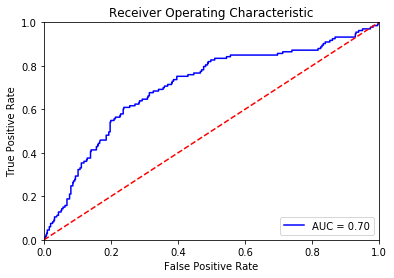

In [269]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()